#Ensemble Learning
This notebook will demonstrate an implementation of an artificial neural network (multi-layer perceptron) with the cwur university ranking dataset. Will analyse target variable World rank with respect to other features

In [ ]:
#Import necessary liabraries
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

data=pd.read_csv('cwurData.csv')
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


# Data cleaning 
Will clean the data to drop unnecessary columns and analyse null values

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [ ]:

data = data.drop(['institution', 'country','national_rank','year', 'score'], axis=1)
data.head()

,world_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents
0,1,7,9,1,1,1,1,NaN,5
1,2,9,17,3,12,4,4,NaN,1
2,3,17,11,5,4,2,2,NaN,15
3,4,10,24,4,16,16,11,NaN,50
4,5,2,29,7,37,22,22,NaN,18


In [ ]:
data.drop('broad_impact', axis=1, inplace=True)

In [ ]:
data.head()

,world_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents
0,1,7,9,1,1,1,1,5
1,2,9,17,3,12,4,4,1
2,3,17,11,5,4,2,2,15
3,4,10,24,4,16,16,11,50
4,5,2,29,7,37,22,22,18


The next step is to select which features we want to use with logistic regression and standardize them
X and y are defined as the input features and output variable

In [ ]:
X = data.iloc[:, 1:8].values
y = data.iloc[:, 0].values

In [ ]:
y

array([   1,    2,    3, ...,  998,  999, 1000])

In [ ]:
#X and y are defined as the input features and output variable
X = data.iloc[:, 1:8].values
y = data.iloc[:, 0].values

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale input and output data using StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()


# Train the model
model = RandomForestRegressor()

# train the bagging model on the training data
model.fit(X_train, y_train)

# evaluate the bagging model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Testing MSE:", mse)


Testing MSE: 0.044476777899212776


computing  the root mean squared error (RMSE) and the R2 score, which are additional metrics for evaluating the model's performance.

In [ ]:
# compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.21089518225699888


In [ ]:
from sklearn.metrics import r2_score

# evaluate the model on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


R2 score: 0.9549845975409389


The R2 score of 0.9549 indicates that the model is able to explain 95.49% of the variance in the dependent variable using the independent variables. This is a relatively high score and suggests that the model is a good fit for the data.

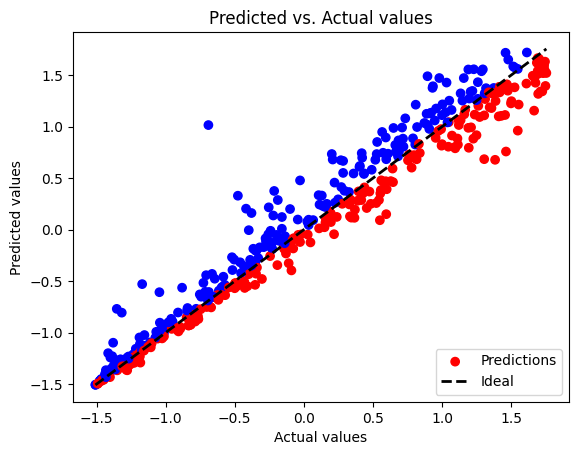

In [ ]:
# create a scatter plot of predicted vs. actual values with different colors
plt.scatter(y_test, y_pred, c=['b' if x < y else 'r' for x, y in zip(y_test, y_pred)], label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs. Actual values")
plt.legend(loc='lower right')
plt.show()


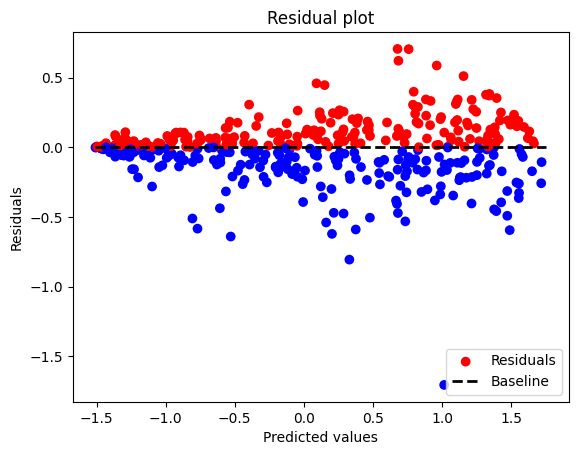

In [ ]:
# plot residuals with a horizontal line at 0
plt.scatter(y_pred, y_test - y_pred, c=['b' if x < y else 'r' for x, y in zip(y_test, y_pred)], label='Residuals')
plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2, label='Baseline')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.legend(loc='lower right')

In [ ]:
X_col = data.iloc[:, 1:8]
X_col

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents
0,7,9,1,1,1,1,5
1,9,17,3,12,4,4,1
2,17,11,5,4,2,2,15
3,10,24,4,16,16,11,50
4,2,29,7,37,22,22,18
...,...,...,...,...,...,...,...
2195,367,567,218,926,845,812,816
2196,236,566,218,997,908,645,871
2197,367,549,218,830,823,812,824
2198,367,567,218,886,974,812,651


The section prints the feature importances of the model and creates a bar plot of the feature importances, which helps to identify the most important features for the model's predictions.

publications: 0.8273720773904089
influence: 0.07531775902140017
alumni_employment: 0.04421070080656945
citations: 0.023469026827926398
patents: 0.020196008107001895
quality_of_education: 0.006297354789614562
quality_of_faculty: 0.0031370730570787486


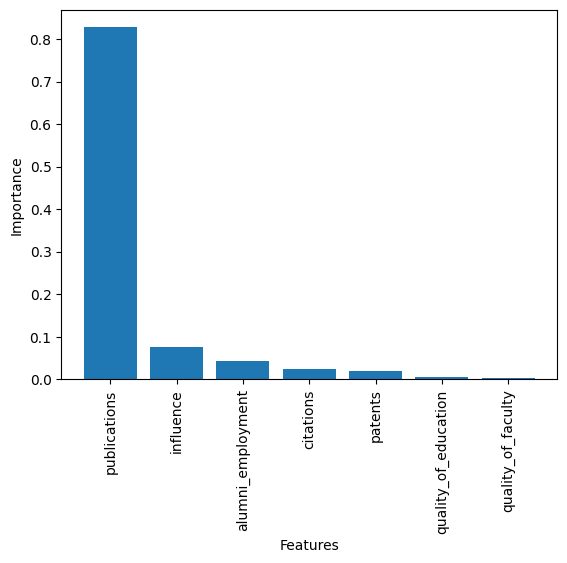

In [ ]:
# Get feature importances
importances = model.feature_importances_

# Sort features in descending order of importance
sorted_idx = importances.argsort()[::-1]

# Print feature importances
for i in sorted_idx:
    print(f"{X_col.columns[i]}: {importances[i]}")
    
# Plot feature importances
plt.bar(range(X_col.shape[1]), importances[sorted_idx])
plt.xticks(range(X_col.shape[1]), X_col.columns[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Conclusion: the most important feature is number of publications followed by influence that affect the world rank of the university